## Machine Learning CA1 | Louis Wilkie | sba22529

### Introduction

#### Library Imports

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

#### Dataset Load

In [2]:
# dataset load
df = pd.read_csv("Invistico_Airline.csv")

In [3]:
sns.set_palette("viridis")

#### Selection of Functions Used

In [4]:
# countplot
def countplot(df, var, x_size=4, y_size=4, title="Countplot", x_label="Values", y_label="Count",
             rotate_xticks=0, ax=None):
    if title == "Countplot":
        title = f"Countplot of {var}"

    if ax is None:
        fig, ax = plt.subplots(figsize=(x_size, y_size))

    sns.countplot(data=df, x=var, ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xticks)
    ax.set_title(title)

    if ax is None:
        plt.show()

In [5]:
# histogram
def histogram(df, var, x_size=4, y_size=4, x_label="Values", y_label="Frequency",
              bins=10, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(x_size, y_size))
    
    sns.histplot(data=df, x=var, kde=False, bins=bins, color='green', ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    title = f"Histogram of {var}"
    ax.set_title(title)
    
    if ax is None:
        plt.show()

In [6]:
# Boxplot
def boxplot(df, var, x_size=4, y_size=4, x_label="Values", y_label="Frequency", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(x_size, y_size))

    sns.boxplot(data=df, x=var, ax=ax, color='skyblue')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    title = f"Boxplot of {var}"
    ax.set_title(title)
    
    if ax is None:
        plt.show()

### Data Exploration

In [7]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [8]:
df.shape

(129880, 23)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [10]:
df.describe(include="object").T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [12]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [13]:
# percentage of missing values
df["Arrival Delay in Minutes"].isnull().sum()/len(df) * 100

0.3025870033877425

In [14]:
df = df.dropna()
df = df.reset_index(drop=True)

In [15]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

#### Correlations

correlation shape: (18, 18)


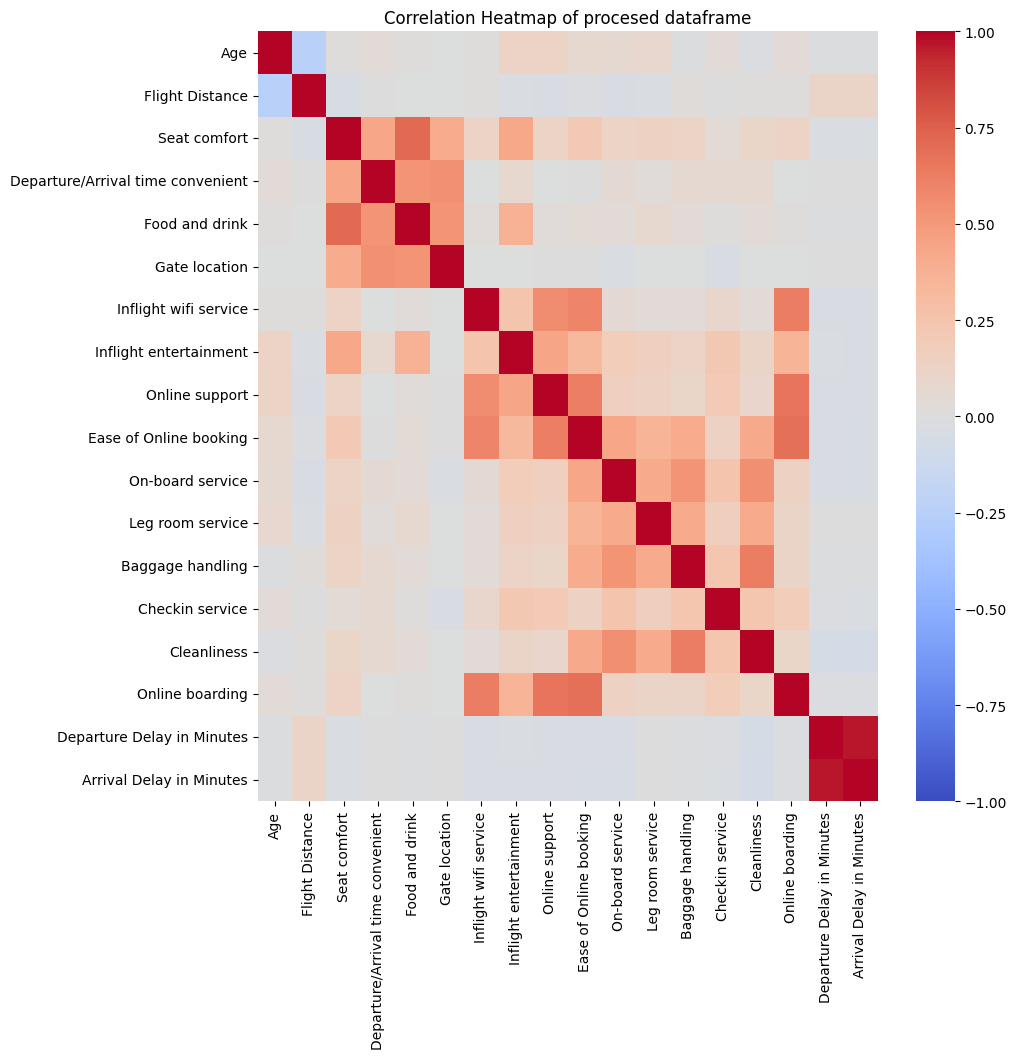

In [16]:
# correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(f"correlation shape: {correlation_matrix.shape}")

# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of procesed dataframe')
plt.show()

#### Flight Time Difference

In [17]:
# correlation of delays
df["Departure Delay in Minutes"].corr(df["Arrival Delay in Minutes"])

0.9652911835463197

In [18]:
# bin edges and labels
bin_edges = [-1, 1, float('inf')]
departure_labels = ['no delay', 'delayed departure']
arrival_labels = ['no delay', 'delayed arrival']

# flight speed binned
df['delayed_departure'] = pd.cut(df['Departure Delay in Minutes'], bins=bin_edges, labels=departure_labels)
df['delayed_arrival'] = pd.cut(df['Arrival Delay in Minutes'], bins=bin_edges, labels=arrival_labels)

In [19]:
df['delayed_departure'] 

0                  no delay
1         delayed departure
2                  no delay
3                  no delay
4                  no delay
                ...        
129482             no delay
129483    delayed departure
129484    delayed departure
129485    delayed departure
129486    delayed departure
Name: delayed_departure, Length: 129487, dtype: category
Categories (2, object): ['no delay' < 'delayed departure']

In [20]:
# flight time difference from schedule
df["flight_time_difference"] = df["Departure Delay in Minutes"] - df["Arrival Delay in Minutes"]
df["flight_time_difference"].describe()

count    129487.000000
mean         -0.447744
std          10.078293
min        -234.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          54.000000
Name: flight_time_difference, dtype: float64

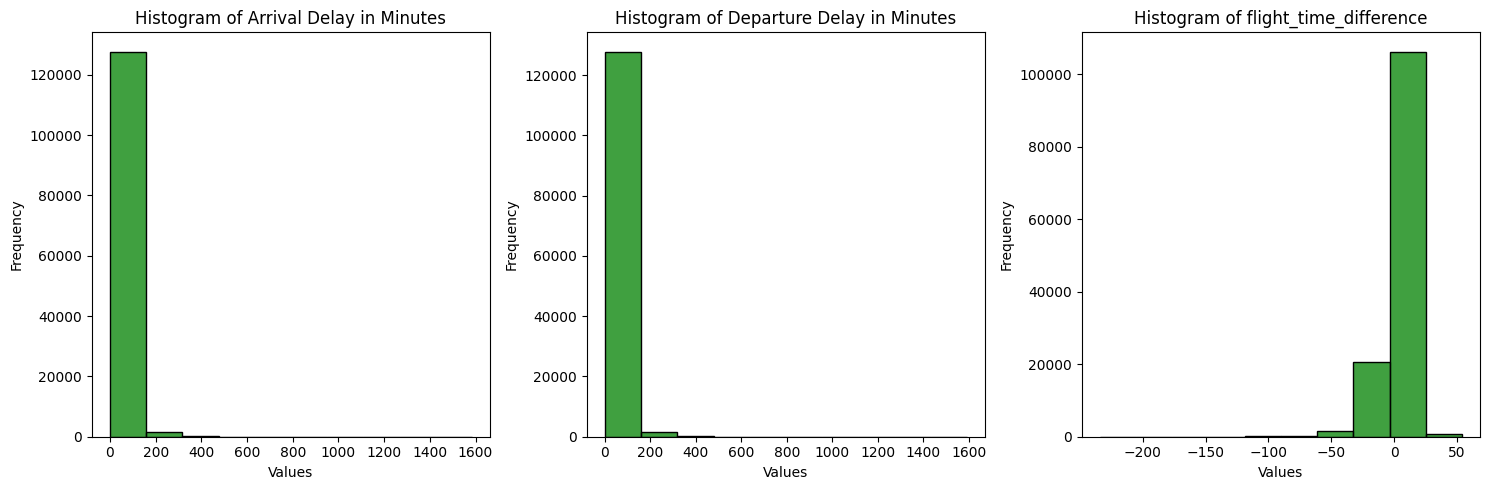

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0] = histogram(df, "Arrival Delay in Minutes", ax=axs[0])
axs[1] = histogram(df, "Departure Delay in Minutes", ax=axs[1])
axs[2] = histogram(df, "flight_time_difference", ax=axs[2])

plt.tight_layout()
plt.show()

In [22]:
# arrival dropped as the signal is now captured in new column
df = df.drop("Arrival Delay in Minutes", axis=1)

In [23]:
df["flight_time_difference"]

0          0.0
1          5.0
2          0.0
3          0.0
4          0.0
          ... 
129482     0.0
129483     2.0
129484    -8.0
129485   -12.0
129486    -1.0
Name: flight_time_difference, Length: 129487, dtype: float64

In [24]:
# bin edges and labels
bin_edges = [-float('inf'), 0, 1, float('inf')]
speed_labels = ['slower', 'average', 'quicker']

# flight speed binned
df['flight_speed'] = pd.cut(df['flight_time_difference'], bins=bin_edges, labels=speed_labels)

In [25]:
df["flight_speed"].value_counts()

flight_speed
slower     92078
quicker    33199
average     4210
Name: count, dtype: int64

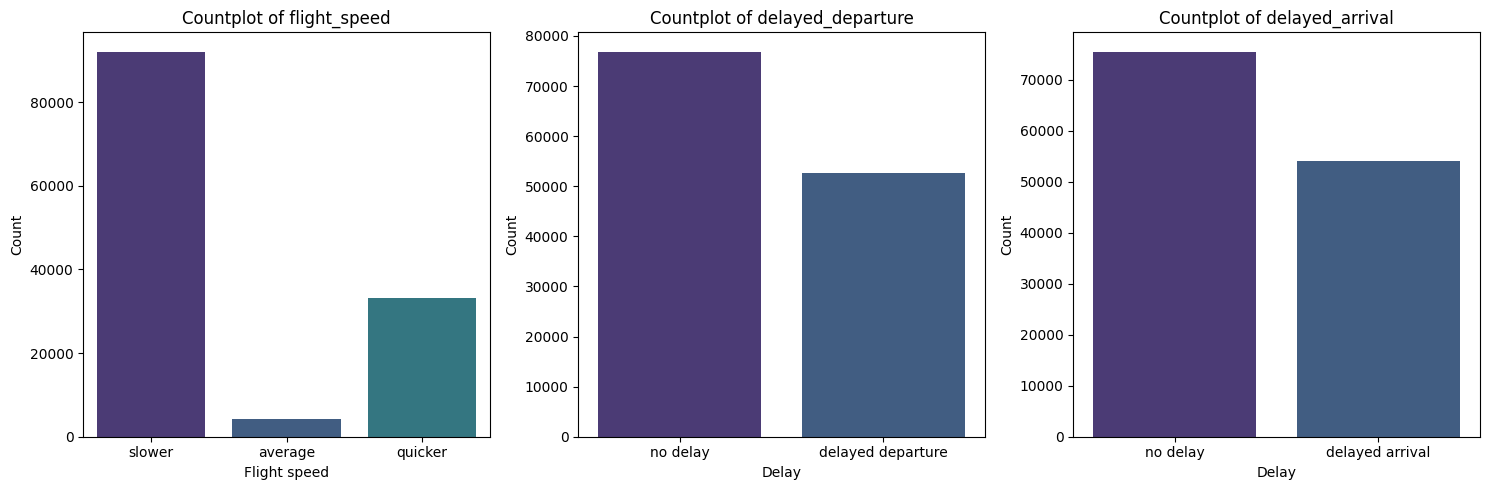

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0] = countplot(df, "flight_speed", x_label="Flight speed", ax=axs[0])
axs[1] = countplot(df, "delayed_departure", x_label="Delay", ax=axs[1])
axs[2] = countplot(df, "delayed_arrival", x_label="Delay", ax=axs[2])

plt.tight_layout()
plt.show()

In [27]:
# departure delay
df["delayed_departure"].value_counts()

delayed_departure
no delay             76880
delayed departure    52607
Name: count, dtype: int64

In [28]:
# arrival delay
df["delayed_arrival"].value_counts()

delayed_arrival
no delay           75500
delayed arrival    53987
Name: count, dtype: int64

In [29]:
contingency_table = pd.crosstab(df["delayed_departure"], df["delayed_arrival"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

In [30]:
contingency_table

delayed_arrival,no delay,delayed arrival
delayed_departure,,
no delay,63434,13446
delayed departure,12066,40541


In [31]:
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-squared statistic: 45597.53987326902
p-value: 0.0
Degrees of freedom: 1
Expected frequencies: [[44826.43045248 32053.56954752]
 [30673.56954752 21933.43045248]]


In [32]:
df['delays'] = df['delayed_departure'].astype(str) + " & " + df['delayed_arrival'].astype(str)

In [33]:
mapping_dict = {'no delay & no delay': 'no delay', 'delayed departure & no delay': 'delayed departure', 'no delay & delayed arrival': 'delayed arrival', 'delayed departure & delayed arrival': 'both delayed'}

In [34]:
df['delays'] = df['delays'].map(mapping_dict).fillna(df['delays'])
df['delays']

0             no delay
1         both delayed
2             no delay
3             no delay
4             no delay
              ...     
129482        no delay
129483    both delayed
129484    both delayed
129485    both delayed
129486    both delayed
Name: delays, Length: 129487, dtype: object

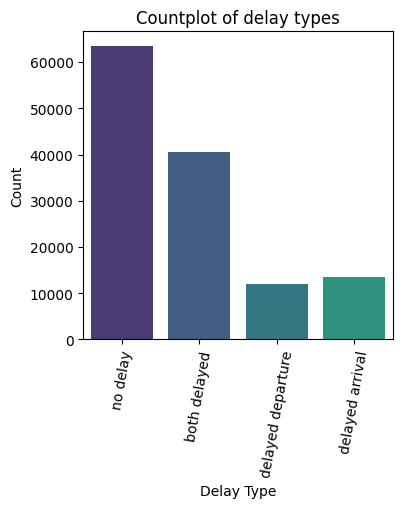

In [35]:
countplot(df, "delays", title="Countplot of delay types", x_label="Delay Type", rotate_xticks=80)

#### Continuous Variables

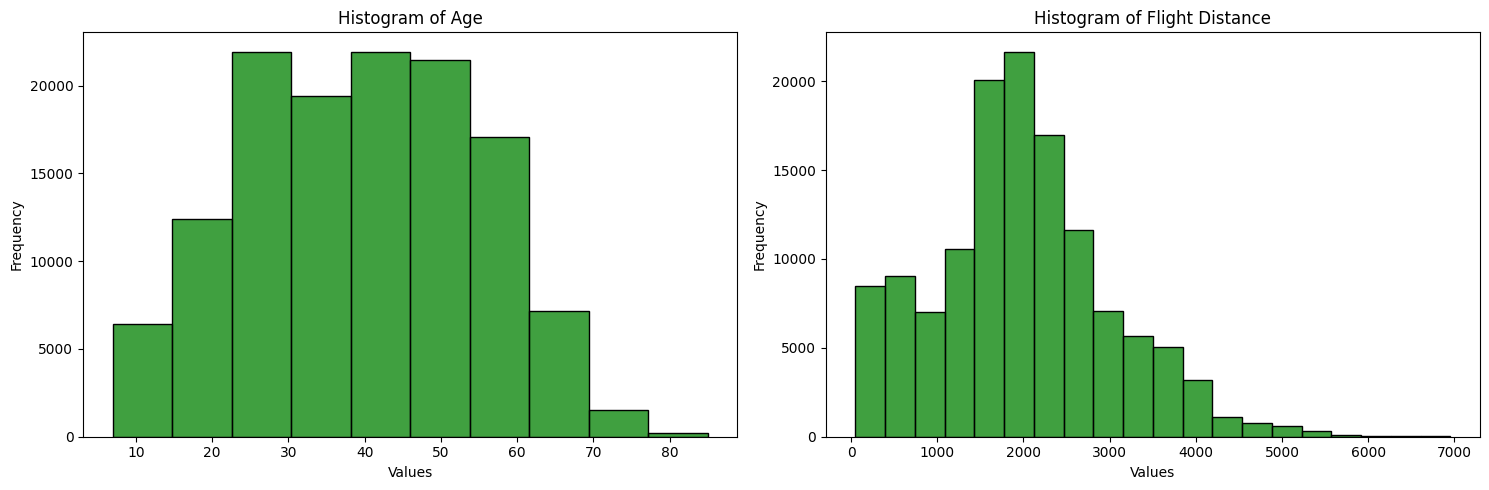

In [36]:
# histograms
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0] = histogram(df, "Age", ax=axs[0])
axs[1] = histogram(df, "Flight Distance", bins=20, ax=axs[1])

plt.tight_layout()
plt.show()

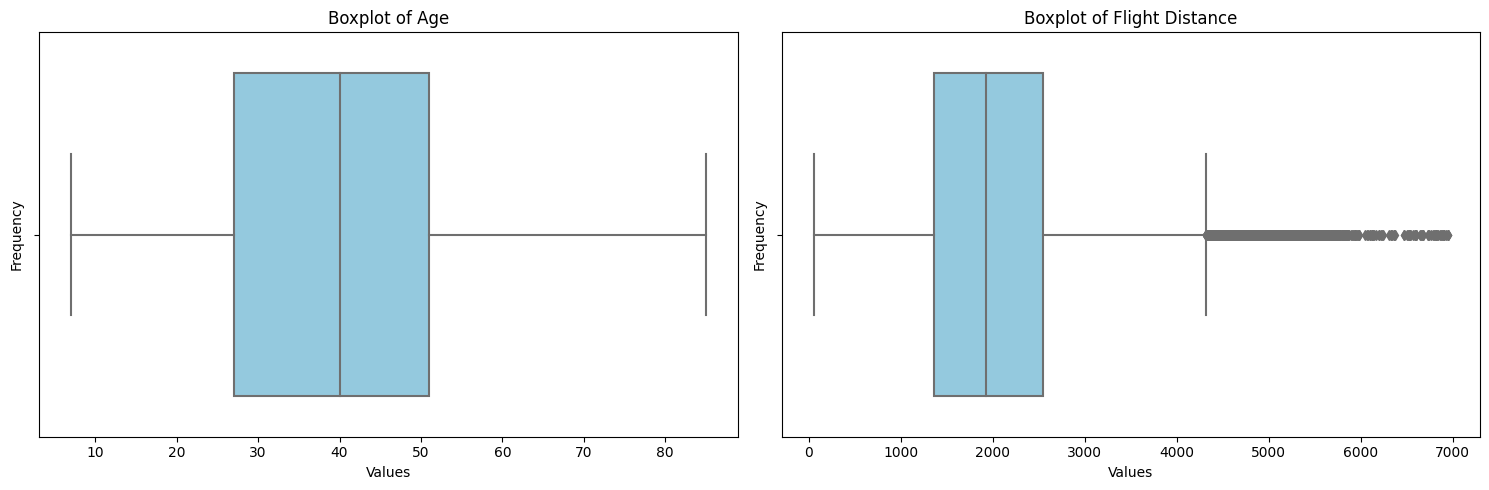

In [37]:
# boxplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


axs[0] = boxplot(df, 'Age', ax=axs[0])
axs[1] = boxplot(df, 'Flight Distance', ax=axs[1])

plt.tight_layout()
plt.show()

#### Ranks

In [38]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,delayed_departure,delayed_arrival,flight_time_difference,flight_speed,delays
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,5,3,2,0,no delay,no delay,0.0,slower,no delay
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,2,3,2,310,delayed departure,delayed arrival,5.0,quicker,both delayed
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,4,4,4,2,0,no delay,no delay,0.0,slower,no delay
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,4,1,3,0,no delay,no delay,0.0,slower,no delay
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,4,2,5,0,no delay,no delay,0.0,slower,no delay


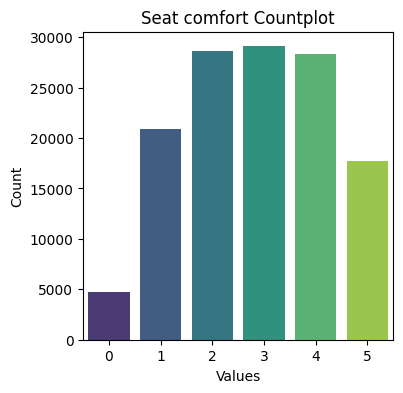

In [39]:
countplot(df, "Seat comfort", title="Seat comfort Countplot")

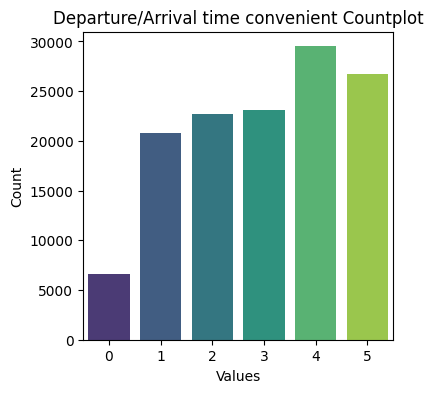

In [40]:
countplot(df, "Departure/Arrival time convenient", title="Departure/Arrival time convenient Countplot")

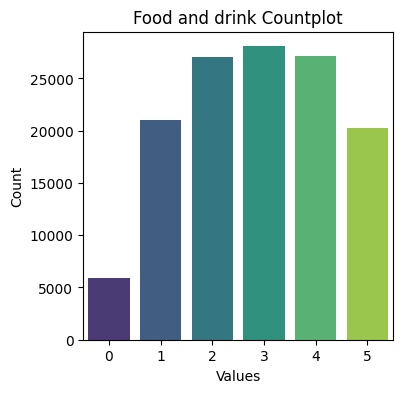

In [41]:
countplot(df, "Food and drink", title="Food and drink Countplot")

#### Categories

In [42]:
df.describe(include="object")

,satisfaction,Gender,Customer Type,Type of Travel,Class,delays
count,129487,129487,129487,129487,129487,129487
unique,2,2,2,2,3,4
top,satisfied,Female,Loyal Customer,Business travel,Business,no delay
freq,70882,65703,105773,89445,61990,63434


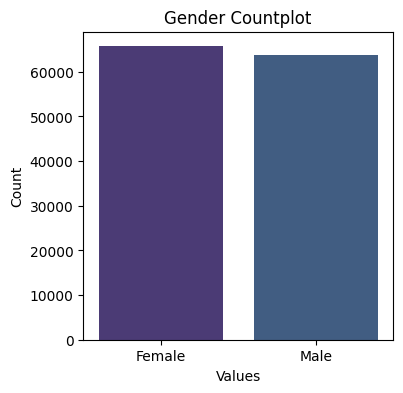

In [43]:
countplot(df, "Gender", title="Gender Countplot")

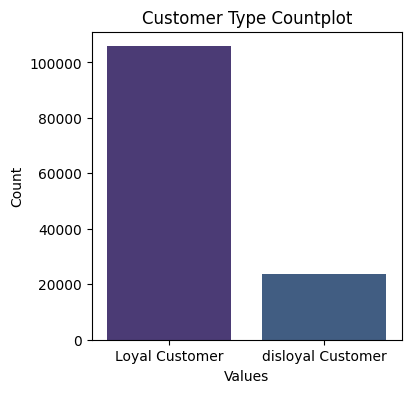

In [44]:
countplot(df, "Customer Type", title="Customer Type Countplot")

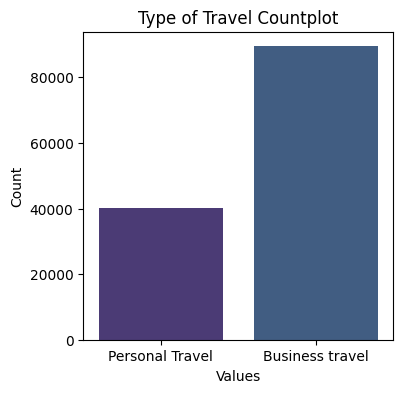

In [45]:
countplot(df, "Type of Travel", title="Type of Travel Countplot")

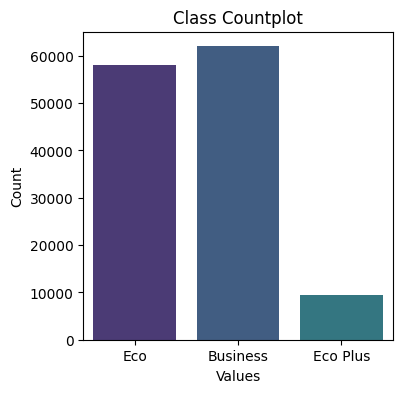

In [46]:
countplot(df, "Class", title="Class Countplot")

#### Target variable

In [47]:
# target variable
df.satisfaction.value_counts()

satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64

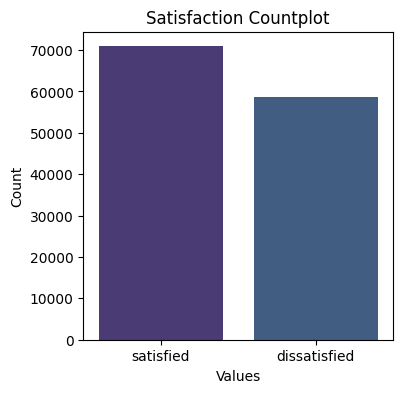

In [48]:
# countplot of target variable
countplot(df, "satisfaction", title="Satisfaction Countplot")

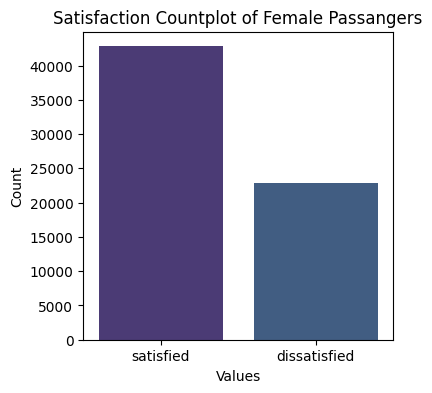

In [49]:
# countplot of female passengers
df1 = df[df["Gender"]=="Female"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Female Passangers")

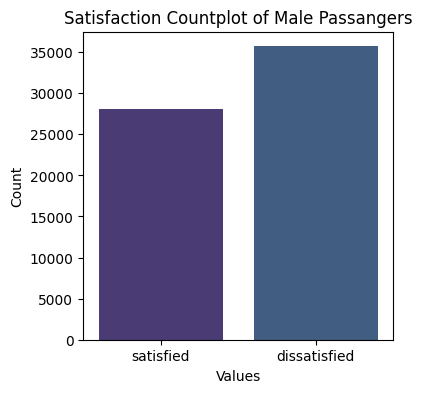

In [50]:
# countplot of male passengers
df1 = df[df["Gender"]=="Male"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Male Passangers")

In [51]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

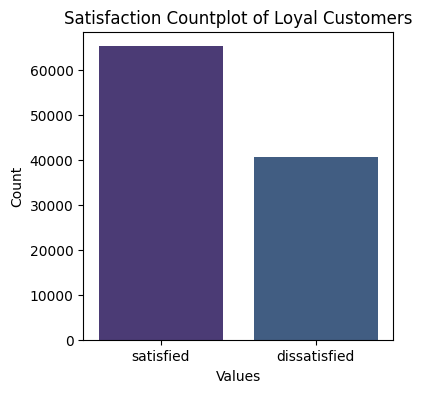

In [52]:
# countplot of loyal customers
df1 = df[df["Customer Type"]=="Loyal Customer"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Loyal Customers")

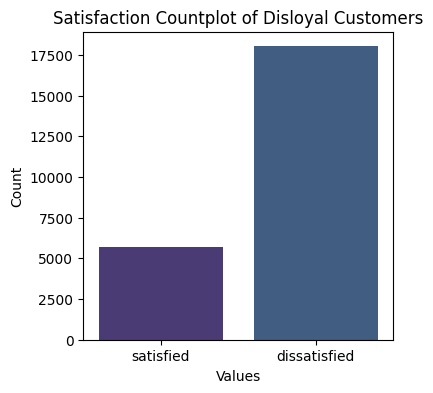

In [53]:
# countplot of disloyal customers
df1 = df[df["Customer Type"]=="disloyal Customer"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Disloyal Customers")

### Data Preparation

#### Null values

In [54]:
# null values were removed earlier instead
#df = df.dropna()
#df = df.reset_index(drop=True)

#### Renaming columns

In [55]:
# renaming rules
df.rename(columns=lambda x: x.replace(' service', ''), inplace=True)
df.rename(columns=lambda x: x.replace('Inflight ', ''), inplace=True)
df.rename(columns=lambda x: x.replace(' in Minutes', ''), inplace=True)

# renaming single columns
df.rename(columns={'Ease_of_Online_booking': 'online_booking'}, inplace=True)
df.rename(columns={'Food_and_drink': 'food'}, inplace=True)
df.rename(columns={'Departure/Arrival time convenient': 'flight_schedule'}, inplace=True)
df.rename(columns={'Type_of_Travel': 'type'}, inplace=True)

# underscores
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# making all lowercase
df.columns = df.columns.str.lower()

#### Splitting target

In [56]:
y = df.satisfaction

In [57]:
X = df.drop("satisfaction", axis=1)

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   gender                  129487 non-null  object  
 1   customer_type           129487 non-null  object  
 2   age                     129487 non-null  int64   
 3   type_of_travel          129487 non-null  object  
 4   class                   129487 non-null  object  
 5   flight_distance         129487 non-null  int64   
 6   seat_comfort            129487 non-null  int64   
 7   flight_schedule         129487 non-null  int64   
 8   food_and_drink          129487 non-null  int64   
 9   gate_location           129487 non-null  int64   
 10  wifi                    129487 non-null  int64   
 11  entertainment           129487 non-null  int64   
 12  online_support          129487 non-null  int64   
 13  ease_of_online_booking  129487 non-null  int64   
 14  on-b

#### Binning Age

In [59]:
# Define bins for every 10 years up to 90
bins = [i for i in range(0, 91, 10)]

# Create labels for the bins
labels = [f'{i}-{i+9}' for i in range(0, 81, 10)]  # Adjusted labels

# Use pd.cut to bin the 'age' column and create the new column
X['age'] = pd.cut(X['age'], bins=bins, labels=labels, right=False)

#### Binning Flight Time Difference

In [60]:
df["flight_time_difference"].describe()

count    129487.000000
mean         -0.447744
std          10.078293
min        -234.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          54.000000
Name: flight_time_difference, dtype: float64

#### Encoding

In [61]:
# continuous columns will be scaled
X_numeric = X[["flight_distance", "departure_delay", "arrival_delay"]]
X_ranks = X.drop(X_numeric.columns, axis=1)

# label encoding binary categories
X_binary = X[["gender", "customer_type", "type_of_travel"]]
X_ranks = X_ranks.drop(X_binary.columns, axis=1)

KeyError: "['arrival_delay'] not in index"

In [ ]:
# binary categories encoded
X_binary = pd.get_dummies(X_binary, columns=X_binary.columns, drop_first=True).astype(int)
X_binary.head()

In [ ]:
# rest of independent encoding
X_ranks = pd.get_dummies(X_ranks, columns=X_ranks.columns).astype(int)
X_ranks.head()

In [ ]:
# target variable
y

In [ ]:
# label encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# satisfied is 1, unsatisfied 0
y

#### Scaling

In [ ]:
X_binary.shape

In [ ]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [ ]:
X_numeric = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)

#### merge X

In [ ]:
X_prepared = pd.concat([X_numeric, X_binary], axis=1)

In [ ]:
X_prepared = pd.concat([X_prepared, X_ranks], axis=1)

In [ ]:
X_prepared

#### Correlations

In [ ]:
correlation_matrix = X_prepared.corr()
correlation_matrix.shape

In [ ]:
# correlation matrix
correlation_matrix = X_prepared.corr()
print(f"correlation shape: {correlation_matrix.shape}")

# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of procesed dataframe')
plt.show()

In [ ]:
X_prepared.head()

In [ ]:
# arrival and departure de
X_prepared.iloc[:,:5].corr()

In [ ]:
#### 

### Modelling